In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', 1000)
import pandas_profiling
import numpy as np
import nltk
import re
import string
from textblob import TextBlob
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.decomposition import LatentDirichletAllocation

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('tableau-colorblind10')
sns.set(context='talk', style='white')

import glob
import os
import pickle

%matplotlib inline

stopwords_base = stopwords.words('english')

## Read in the data

In [2]:
datadir = '/Users/markyramone/Data_Science/metis/metisgh/projects_loc/Fletcher'
os.chdir(datadir + '/data')

dfs = []
for file in glob.glob('*.pkl'):
    dfs.append(pd.read_pickle(file))
    
df = pd.concat(dfs)

## Basic EDA and investigate messiness

In [3]:
df.head()

body  \
0  \nFresh from my second experience with LSD and still beaming with the afterglow, I find myself back in the real world of work and taxes and congested transit lines once more. The Australian bush, serene and simple, is an ideal place to trip on this beautiful substance, and I wish I could have stayed forever. But there will be another time, already eagerly awaited, to share this experience again with wonderful friends who understand exactly the joy and wonder of opening your mind to the beauty of natural creation.\r\n\nWhat can I call this trip but my final inauguration into the world of psychedelics? Ive had a rocky start on this journey, bad trips and major let-downs that have filled my mind with doubt and anxiety. Now I feel LSD has taught me the fundamental rules of psychonautics, the same lessons more experienced psychonauts have tried to instil in me, only this time, the sheer power of those hours under the night sky broke through my stubborn expectations and showed me. As they say: life-changing.\r\n\nFirst, a little background. I started out with dextromethorphan, but discontinued after a third plateau trip that left me feeling like a broken soul who didnt really exist. I then moved on to mushrooms, starting with a two gram trip of a potent species, and it all went well enough until I encountered something so horrific, it shattered my resolve to use hallucinogens as tools for self-discovery, and had me traumatised for a week. In the wake of the four worst hours of my life, I spent the next two months piecing together just what had gone so, so wrong. Did I have some neurological disorder that prevents me from having an experience that isnt an acute psychotic episode? If I continued dabbling with these substances, would I lose my mind for good? If not for my desperate need for answers, I would have walked away at that point, and I often felt a wiser person would have done just that.\r\n\nBear with me as I describe this nightmare of a bad trip. Imagine yourself walking about, ruminating on ever more confused and less sane philosophy about being God, when suddenly, all your senses warp into a confused mess. Everything you see, hear and feel no longer makes the slightest sense, as your room transforms into a mesh of colours and you lose the ability to distinguish sound and touch from emotion and thought. It is to find yourself catapulted out of this human existence into some other place where nothing is solid, there is no time, sanity dissolves, and amid the absolute disorientation there is only one clear thought: Oh. Fuck.\r\n\nI have just fucked up my life.\r\n\nIts impossible to say how long this lasted, perhaps a minute, perhaps an hour. The only awareness I had of the outside world was that it must still be there, and that my friends and family must be so horrified that I destroyed my mind on drugs. As it began to clear, and the connections between percept and concept re-established, I looked around the room with only slightly less confusion. What was this place, who was I, what was I? I had no idea. I spent the rest of the trip gradually working through the confusion to find myself again. I awoke next morning to severe depression and a conviction that I would never, ever touch drugs again.\r\n\nThe night had been so confusing that it was only when I took acid two months later that I remembered this disconnect between my perceptions and my ability to interpret, the dissolution of boundary between thought and senses. All I had was vague memories of a hellish experience that felt like serious brain damage. But acid has a unique way of enhancing my imagination, and now that I understand just what happened, Ive come to know it as the Blur.\r\n\nI tried san pedro, only to find the specimen was inactive. I tried weed for the first time at four hits, and it triggered a minor flashback of the Blur, which I no better understood, but it left me feeling that continuing hallucinogen use would be a sure one-way t

In [4]:
df.tail()

body  \
45  \n[Erowid Note: \nThe dose described in this report is very high, potentially beyond Erowid's 'heavy' range, and could pose serious health risks or result in unwanted, extreme effects. Sometimes extremely high doses reported are errors rather than actual doses used.] \n\nA normal weekend, other than the rare and sudden call from a friend who could obtain those mushrooms I was always looking for. I let most of my friends have first dibs on the stuff and then I just kept what was left over. My friends had described heavy trips off of very small doses of this certain strain. Most of the friends taking doses of around 2 grams or less.\r\n\nIt was a normal monday night, bowling league night for my place of work, a few coworkers and a manager making up the remainder of the team. I sit at home after taking a shower and getting ready for the night at hand. The remainder of the mushrooms were sitting on my desk and I had intended on taking some for the night of bowling. I knew I had about 7.5 grams left and I didn't want to really have to deal with having them in my possession any longer than I already had. I save a gram and a half for one of my team members and pour the remaining 6 grams onto my desk and prepare to consume. I start to eat them, downing them with a handy soda. Typical mushroom taste and stomach feeling. And then it is time to leave. **Disclaimer: Driving while intoxicated or under the influence of any mind altering substance is extremely dangerous and is probably not a good idea (of course it took this experience to realize the severity of that claim)**\r\n\n[Erowid Note: \nDriving while intoxicated, tripping, or extremely sleep deprived is dangerous and irresponsible because it endangers other people. Don't do it!] \n\nI take off down the highway for my about 20-30 minute trip to the bowling alley. When I get closer to the alley I notice and extreme increase in the amount of lights that are usually around that area of town. I'm driving and thinking that I feel really good, but there is a slow realization that this is just the beginning of something huge.\r\n\nI arrive at the bowling alley, still climbing, but rapidly. I go into the bowling alley, and there are visuals abound, morphing of designs and colors, and they are the most intense visuals I have ever seen (so far at least). I find my teammates and tell the non-manager ones what I have consumed just to keep them in the know.\r\n\nAt this point I had gone to get a large lemonade and had settled down in a good seat. We luckily had to bowl against a ghost team, which would likely lessen the possible problems that my state of mind might cause. I start to become overwhelmed with anxiety. I have always had the anxiety before the peak of mushroom trips, but this time it was more intense and was actually frightening me at one point. I was convinced that I couldn't handle being in a public place and I kept telling my teammates that I was going to go home, which would have actually been the worst idea. \r\n\nAt this point I am experiencing ever increasing visuals (like seeing myself drinking out of a pool of lemonade whenever I took a drink from my beverage), and feel that I am on the verge of a panic attack. I'm slowly realizing that there is nothing I can do to stop what is coming, and I finally give up my mental fight of control.\r\n\nThis is the gateway into my real trip, my peak where all of this has been leading up to. I would say there was about 2 hours in between me eating the mushrooms initially and the peak. My mind loses its attachment from reality and I am plunged into a very intense, long, and spiritual journey. The way I rationalize my mental state is the following:\r\n\nIf you think of your mind in two parts, the part that controls yourself in the real world, and your unconscious. I believe that I, the normal controller of my physical body was plunged into the world of my unconscious and the physical body was controlled by the unconscious and was

In [5]:
df.profile_report()

In [6]:
# Drop rows with no text body

df.dropna(subset=['body'], inplace=True)

In [7]:
sum(df['body'].isna())

0

In [8]:
# There are a lot of duplicated reports

df.shape[0] - 7832

2130

In [9]:
# Drop duplicates

df.drop_duplicates(subset='exp_id', inplace=True)
df.shape[0]

7831

In [10]:
df['drug'].value_counts()

Mushrooms           1492
Salvia_divinorum    1238
LSD                 1121
MDMA                911 
Cannabis            780 
DMT                 501 
Opioids             464 
Ketamine            363 
Cocaine             263 
Nitrous_Oxide       221 
Amphetamines        214 
Datura              150 
PCP                 59  
Peyote              32  
Belladonna          22  
Name: drug, dtype: int64

In [11]:
# Fix some drug names

df['drug'].replace('Salvia_divinorum', 'Salvia', inplace=True)
df['drug'].replace('Nitrous_Oxide', 'Nitrous Oxide', inplace=True)

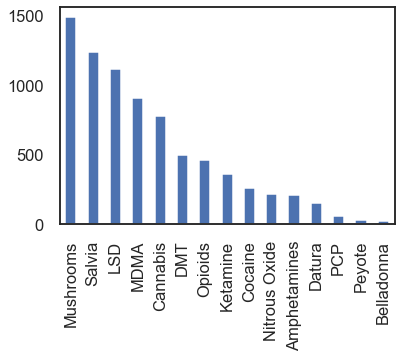

In [12]:
# Plot distribution over drug categories

df['drug'].value_counts().plot(kind='bar')

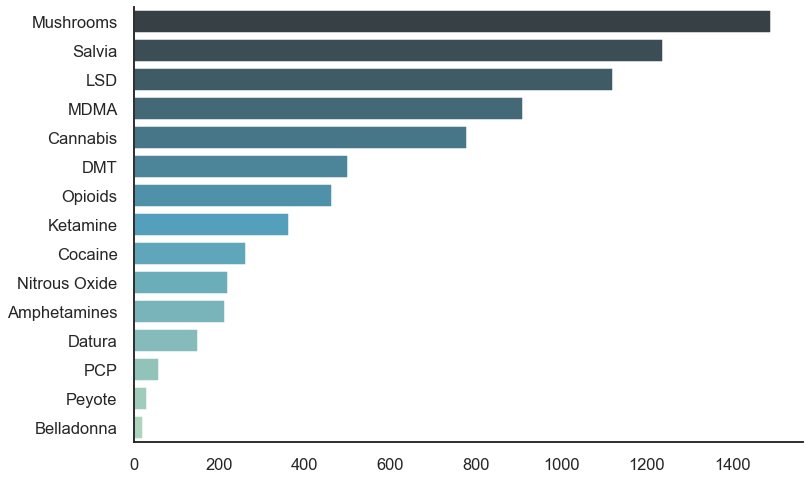

In [13]:
# Nicer plot

fig, ax = plt.subplots(figsize=(12,8))

sns.barplot(df['drug'].value_counts().values, df['drug'].value_counts().index, palette='GnBu_d')
sns.despine()

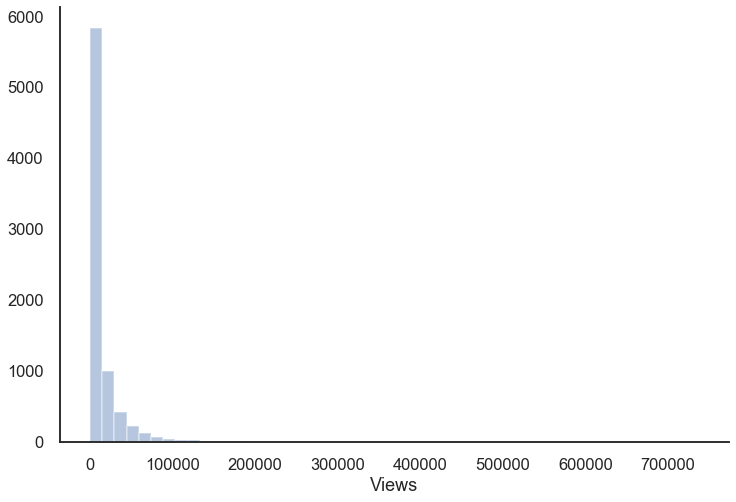

In [14]:
# Look at distribution of report views

fig, ax = plt.subplots(figsize=(12,8))

sns.distplot(df['views'], axlabel='Views', kde=False)
sns.despine()

In [15]:
# Which report had the most views

max_views = df['views'].max()
most_viewed = df.loc[df['views'] == max_views, 'body']
most_viewed

6    \nBACKGROUND:\r\nThe summer after my freshman year I bought a mushroom kit from a local head shop with the intention of taking it home and doing mushrooms all summer long.  I had previously tripped on low dosages (one 2.5 gram trip, one 1 gram trip, one 4 gram trip) of mushrooms earlier in the year.  These trips amounted to nothing more than a few breathing walls, small visual distortions, and very stoned thoughts.\r\n\nMindset:\r\nFastforward to mid-summer.  The mushrooms took a very long time to grow, something like a month and a half.  No complaints really, since it was a kit that required little to no attention or preparation, just a little anxious to do my mushrooms since my summer was already half gone.  Due to the unforseen growing time of the shrooms I had decided to do a large dose at once.  I knew I had to plan my trip carefully knowing this.  Before dropping the shrooms I drilled it in to my brain that it was going to be a good trip and that all variables within my cont

In [16]:
def clean_text(df, textcol):
    df[textcol] = df[textcol].str.replace(r'http\S+', '') #remove links
    df[textcol] = df[textcol].str.replace(r'http', '')
    df[textcol] = df[textcol].str.strip() # remove \n
    df[textcol] = df[textcol].str.replace(r'(\\x91)|(\\x92)', ' ') # remove encoded rendering of apostrophes
    df[textcol] = df[textcol].str.replace(r'[^A-Za-z]', ' ') # remove nonstandard, numerics, punctuation
    df[textcol] = df[textcol].str.lower() # convert to lower case
    
    # Replace some common mispellings, add here as they arise
    df[textcol] = df[textcol].str.replace('psychadelic', 'psychedelic')
    return df

In [17]:
df_clean = clean_text(df, 'body')

In [18]:
clean1 = df_clean['body'].sample(n=1)
clean1

47    i came into possession of an eighth of mushrooms  they were a bit overpriced but due to the rarity of these magical fungi i was more than willing to pay  this would be my first time tripping and i was more than a little excited to finally experience the notorious journey i had heard so much about    we had been planning on going camping with some other friends who also were going to be tripping that night  but as fate would have it we ended up going to another friend s house who had an open house for the weekend  the setting was a large house in a small town neighborhood  my friend who owned the house  charley  was having several people over who planned on drinking and having a high ole time  my fellow tripping friend  we ll call him gary  and i ingested the mushrooms around     pm  i decided to take only half an     but my buddy munched the whole godamned thing  i expected to have a mild trip due to the smaller amount ingested  directly after eating them we smoked a bowl and sat

In [19]:
# Save cleaned, un-tokenized text data for sentiment analysis

pickle.dump(df_clean, open(datadir + '/prepro/df_clean.pkl', 'wb'))

## Preliminary topic modeling

In [118]:
X = df_clean['body']

In [198]:
def build_stopwords(stopwords_base, stopwords_extension):
    stopwords_base.extend(stopwords_extension)
    
    return stopwords_base

In [199]:
stopwords_base

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [286]:
# Add to base stopwords

drug_names = ['amphetamines', 'benzodiazepines', 'belladonna', 'cannabis', 'belladonna', 'cocaine', 'datura', 'dmt',
              'ketamine', 'lsd', 'mdma', 'mushrooms', 'nitrous', 'oxide', 'opioids', 'pcp', 'peyote', 'salvia',
              'divinorum', 'adderall', 'marijuana', 'psilocybin']

drug_slang = ['pills', 'pill', 'benzos', 'weed', 'pot', 'herb', 'bowl', 'pipe', 'smoke', 'smoked', 'smoking', 'coke',
              'powder', 'mg', 'dose', 'trip', 'tripping', 'drug', 'drugs', 'shrooms', 'shroom', 'mushroom', 'snort',
              'snorted', 'acid', 'gram', 'line', 'lines', 'crack', 'tab', 'tabs', 'blotter', 'opiates', 'roll',
              'rolling', 'rolled', 'bong', 'hit', 'hits', 'opiate', 'ecstasy', 'heroin', 'oxycodone', 'methadone',
              'hydrocodone', 'oxycontin', 'oxy', 'doses']

other = ['like', 'really', 'didn', 'couldn', 'wouldn', 'wasn', 'was', 'did', 'just', 'took', 'went', 'did', 've', 
         'got', 'started', 'felt', 'feeling', 'could', 'something', 'thing', 'things', 'would', 'experience' ,'time',
         'one', 'though', 'experiences']

stopwords_extension = drug_names + drug_slang + other

In [276]:
stopwords = build_stopwords(stopwords_base, stopwords_extension)

In [281]:
cv = CountVectorizer(stop_words=stopwords, ngram_range=(1, 2), max_df=.5, min_df=10)
X_cv = cv.fit_transform(X)

In [282]:
pd.DataFrame(X_cv.toarray(), columns=cv.get_feature_names()).head()

,aaron,ab,aback,abandon,abandoned,abandoning,abandonment,abbey,abdomen,aber,abilities,ability,ability communicate,ability control,ability feel,ability focus,ability move,ability see,ability speak,ability think,abit,abject,able,able accept,able achieve,able anything,able appreciate,able bring,able calm,able carry,able come,able communicate,able comprehend,able concentrate,able connect,able control,able convince,able describe,able drive,able eat,able enjoy,able even,able explain,able express,able fall,able feel,able finally,able find,able finish,able focus,able fully,able function,able get,able give,able go,able grasp,able handle,able hear,able help,able hold,able interact,able keep,able know,able learn,able leave,able let,able live,able look,able maintain,able make,able move,able obtain,able open,able perceive,able pick,able play,able pull,able put,able reach,able read,able realize,able recall,able recognize,able relate,able relax,able remember,able return,able say,able see,able sense,able share,able sit,able sleep,able speak,able stand,able stay,able stop,able take,able talk,able tell,able think,able type,able understand,able use,able walk,able watch,able work,able write,abnormal,abnormally,aboard,abode,abort,aborted,abrasive,abroad,abrupt,abruptly,absence,absent,absinthe,absolute,absolute bliss,absolute shit,absolute terror,absolutely,absolutely amazing,absolutely beautiful,absolutely certain,absolutely control,absolutely convinced,absolutely everything,absolutely gorgeous,absolutely hilarious,absolutely horrible,absolutely idea,absolutely incredible,absolutely insane,absolutely love,absolutely loved,absolutely mind,absolutely nothing,absolutely perfect,absolutely sense,absolutely stunning,absolutely sure,absolutely terrified,absolutely way,absolutely wonderful,absolutley,absolutly,absorb,absorbed,absorbing,absorption,abstain,abstained,abstaining,abstinence,abstract,abstract thoughts,abstraction,abstractions,absurd,absurdity,absurdly,abundance,abundant,abuse,abused,abusing,abusive,abyss,ac,acacia,academic,academically,accelerate,accelerated,accelerating,acceleration,accent,accents,accentuated,accept,accept fact,acceptable,acceptance,accepted,accepted death,accepted fact,accepting,accepts,access,accessed,accessible,accessing,accessories,accident,accidental,accidentally,accidently,accidents,accompanied,accompanies,accompany,accompanying,accomplish,accomplished,accomplishing,accomplishment,accord,accordance,according,according friend,according friends,accordingly,account,account first,account happened,accounted,accounts,accross,accumulated,accuracy,accurate,accurate description,accurate scale,accurately,accurately describe,accused,accustomed,acetaminophen,ache,ached,aches,achieve,achieved,achievement,achieving,aching,acidic,acids,acknowledge,acknowledged,acknowledgement,acknowledging,acne,aco,acoustic,acoustic guitar,acquaintance,acquaintance mine,acquaintances,acquainted,acquire,acquired,acquired friend,acquired grams,acquiring,acres,acrid,across,across body,across campus,across ceiling,across chest,across country,across entire,across face,across field,across floor,across lake,across mind,across road,across room,across screen,across skin,across sky,across space,across street,across surface,across table,across town,across universe,across vision,across walls,across water,across whole,acrylic,act,act normal,act normally,act sober,acted,acting,acting little,acting normal,acting strange,acting strangely,acting weird,action,actions,activate,activated,activation,active,active ingredient,active small,actively,activities,activity,actor,actors,acts,actual,actual physical,actual used,actuality,actually,actually able,actually also,actually back,actually bad,actually became,actually become,actually began,actually believe,actually believed,actually best,actually came,actually come,actually control,actually different,actually done,actually enjoy,actually enjoyed,actually even,actually exist,actually existed,actually experienced,actually exper

In [277]:
tf = TfidfVectorizer(stop_words=stopwords, ngram_range=(1, 2), max_df=.5, min_df=10)
X_tf = tf.fit_transform(X)

In [278]:
pd.DataFrame(X_tf.toarray(), columns=tf.get_feature_names()).head()

,aaron,ab,aback,abandon,abandoned,abandoning,abandonment,abbey,abdomen,aber,abilities,ability,ability communicate,ability control,ability feel,ability focus,ability move,ability see,ability speak,ability think,abit,abject,able,able accept,able achieve,able anything,able appreciate,able bring,able calm,able carry,able come,able communicate,able comprehend,able concentrate,able connect,able control,able convince,able describe,able drive,able eat,able enjoy,able even,able explain,able express,able fall,able feel,able finally,able find,able finish,able focus,able fully,able function,able get,able give,able go,able grasp,able handle,able hear,able help,able hold,able interact,able keep,able know,able learn,able leave,able let,able live,able look,able maintain,able make,able move,able obtain,able open,able perceive,able pick,able play,able pull,able put,able reach,able read,able realize,able recall,able recognize,able relate,able relax,able remember,able return,able say,able see,able sense,able share,able sit,able sleep,able speak,able stand,able stay,able stop,able take,able talk,able tell,able think,able type,able understand,able use,able walk,able watch,able work,able write,abnormal,abnormally,aboard,abode,abort,aborted,abrasive,abroad,abrupt,abruptly,absence,absent,absinthe,absolute,absolute bliss,absolute shit,absolute terror,absolutely,absolutely amazing,absolutely beautiful,absolutely certain,absolutely control,absolutely convinced,absolutely everything,absolutely gorgeous,absolutely hilarious,absolutely horrible,absolutely idea,absolutely incredible,absolutely insane,absolutely love,absolutely loved,absolutely mind,absolutely nothing,absolutely perfect,absolutely sense,absolutely stunning,absolutely sure,absolutely terrified,absolutely way,absolutely wonderful,absolutley,absolutly,absorb,absorbed,absorbing,absorption,abstain,abstained,abstaining,abstinence,abstract,abstract thoughts,abstraction,abstractions,absurd,absurdity,absurdly,abundance,abundant,abuse,abused,abusing,abusive,abyss,ac,acacia,academic,academically,accelerate,accelerated,accelerating,acceleration,accent,accents,accentuated,accept,accept fact,acceptable,acceptance,accepted,accepted death,accepted fact,accepting,accepts,access,accessed,accessible,accessing,accessories,accident,accidental,accidentally,accidently,accidents,accompanied,accompanies,accompany,accompanying,accomplish,accomplished,accomplishing,accomplishment,accord,accordance,according,according friend,according friends,accordingly,account,account first,account happened,accounted,accounts,accross,accumulated,accuracy,accurate,accurate description,accurate scale,accurately,accurately describe,accused,accustomed,acetaminophen,ache,ached,aches,achieve,achieved,achievement,achieving,aching,acidic,acids,acknowledge,acknowledged,acknowledgement,acknowledging,acne,aco,acoustic,acoustic guitar,acquaintance,acquaintance mine,acquaintances,acquainted,acquire,acquired,acquired friend,acquired grams,acquiring,acres,acrid,across,across body,across campus,across ceiling,across chest,across country,across entire,across face,across field,across floor,across lake,across mind,across road,across room,across screen,across skin,across sky,across space,across street,across surface,across table,across town,across universe,across vision,across walls,across water,across whole,acrylic,act,act normal,act normally,act sober,acted,acting,acting little,acting normal,acting strange,acting strangely,acting weird,action,actions,activate,activated,activation,active,active ingredient,active small,actively,activities,activity,actor,actors,acts,actual,actual physical,actual used,actuality,actually,actually able,actually also,actually back,actually bad,actually became,actually become,actually began,actually believe,actually believed,actually best,actually came,actually come,actually control,actually different,actually done,actually enjoy,actually enjoyed,actually even,actually exist,actually existed,actually experienced,actually exper

In [187]:
def print_top_words(model, feature_names, n_top_words=20):
    """
    Print top words in each topic
    """
    for ix, topic in enumerate(model.components_):
        inds = topic.argsort()
        print(f'Topic {ix}: \n')
        print(', '.join([feature_names[i] for i in inds[:-n_top_words - 1:-1]]))
        print('\n')

In [279]:
nmf = NMF(n_components=10)
doc_topic_nmf = nmf.fit_transform(X_tf)

In [280]:
print_top_words(nmf, tf.get_feature_names())

Topic 0: 

said, told, friends, remember, house, bad, kept, room, wanted, looked, asked, thinking, knew, tried, scared, talking, happened, trying, anything, shit


Topic 1: 

reality, world, consciousness, universe, god, sense, self, existence, human, death, real, ego, physical, space, love, moment, state, energy, fear, part


Topic 2: 

effects, quite, bit, visuals, effect, point, although, visual, psychedelic, hours, however, seemed, definitely, slightly, intense, strong, interesting, music, probably, seems


Topic 3: 

us, began, walked, trees, looked, seemed, sky, walking, tree, walk, sat, park, house, forest, sun, beautiful, grass, woods, saw, beach


Topic 4: 

room, eyes, closed, began, bed, light, looked, seconds, head, saw, seemed, vision, closed eyes, colors, wall, held, opened, face, music, floor


Topic 5: 

car, driving, drive, driving intoxicated, endangers, note driving, intoxicated extremely, dangerous irresponsible, irresponsible endangers, endangers people, deprived d

In [284]:
nmf = NMF(n_components=10)
doc_topic_nmf = nmf.fit_transform(X_cv)

In [285]:
print_top_words(nmf, cv.get_feature_names())

Topic 0: 

effects, bit, music, pm, high, point, hours, visuals, quite, well, half, hour, water, lot, eyes, pretty, taking, last, almost, since


Topic 1: 

ich, und, die, mich, war, zu, der, das, es, mir, auf, mit, nicht, ein, den, eine, von, auch, sehr, sie


Topic 2: 

world, reality, self, every, consciousness, god, within, love, sense, light, place, moment, state, yet, universe, human, energy, physical, always, part


Topic 3: 

said, friends, told, wanted, house, asked, home, bad, everyone, looked, car, knew, want, anything, kept, talking, tried, high, sat, ever


Topic 4: 

us, look, walk, looked, looking, walking, right, car, trees, point, sky, beautiful, walked, water, tree, head, hill, long, come, place


Topic 5: 

began, seemed, became, looked, point, saw, eyes, sat, music, world, realized, suddenly, found, intense, walked, left, almost, friends, noticed, thoughts


Topic 6: 

friends, peter, may, user, us, effects, psychedelic, found, seemed, knew, able, alone, remember, m

array([[0.29426656, 0.        , 0.73822624, ..., 0.23973071, 0.00702533,
        0.04921219],
       [0.07808488, 0.00185997, 0.25712582, ..., 0.        , 0.01921616,
        0.        ],
       [0.        , 0.00412099, 0.27956748, ..., 0.        , 0.        ,
        0.15092127],
       ...,
       [0.30116665, 0.        , 0.21042665, ..., 0.11349069, 0.        ,
        0.        ],
       [0.26175488, 0.00907367, 0.17775196, ..., 0.        , 0.        ,
        0.08227652],
       [0.16160487, 0.        , 0.9236189 , ..., 0.09944143, 0.04363042,
        0.00097976]])

In [ ]:
#pickle.dump(X_cv, open(datadir + '/prepro/X_cv'))